In [32]:
import glob,os,cv2,datetime
import matplotlib.pyplot as plt
# label_path = r'D:\xinje_workspace\project\1\dataset\origin\Annotations'
label_path = r'C:\Users\DELL\Desktop\1\Annotations'
# img_path = r'D:\xinje_workspace\project\1\dataset\origin\JPEGImages'
img_path = r'C:\Users\DELL\Desktop\1\JPEGImages'
save_label_path = r'D:\xinje_workspace\project\1\dataset\origin\512\Annotations'
save_img_path = r'D:\xinje_workspace\project\1\dataset\origin\512\JPEGImages'
target_w,target_h = [512,512]
labels = os.listdir(label_path)
imgs = os.listdir(img_path)
for label in (labels):
    lab = cv2.imread(os.path.join(label_path,label),0)
    img = cv2.imread(os.path.join(img_path,label.split('.')[0]+'.jpg'))
    ret,thresh = cv2.threshold(lab, 0, 255, cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)
    # contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    print(label.split('.')[0]+'.jpg')
    assert num_labels > 1
    for n in range(num_labels-1):
        # M = cv2.moments(c) # 计算第一条轮廓的各阶矩,字典形式
        # center_x = int(M["m10"] / M["m00"])
        # center_y = int(M["m01"] / M["m00"])
        x, y, w, h, area = stats[n+1]
        center_x = x - w//2
        center_y = y - h//2
        print(x, y, w, h,area)
        if area < 5:
            continue
        
        if w > target_w or h > target_h:
            for i in range(int(w/target_w)+1):
                for j in range(int(h/target_h)+1):
                    crop_img = img[y+j*target_h:y+(j+1)*target_h,x+i*target_w:x+(i+1)*target_w]  
                    crop_lab = lab[y+j*target_h:y+(j+1)*target_h,x+i*target_w:x+(i+1)*target_w]
                    time = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-%f')
                    cv2.imwrite(os.path.join(save_img_path,'{}.jpg'.format(time)),crop_img)
                    cv2.imwrite(os.path.join(save_label_path,'{}.png'.format(time)),crop_lab)
        else:
            crop_img = img[center_y-target_h//2:center_y+target_h//2,center_x-target_w//2:center_x+target_w//2]  
            crop_lab = lab[center_y-target_h//2:center_y+target_h//2,center_x-target_w//2:center_x+target_w//2]
            time = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-%f')
            cv2.imwrite(os.path.join(save_img_path,'{}.jpg'.format(time)),crop_img)
            cv2.imwrite(os.path.join(save_label_path,'{}.png'.format(time)),crop_lab)








Pic_2022_10_13_163530_6.jpg
2
1282 819 138 124 12819


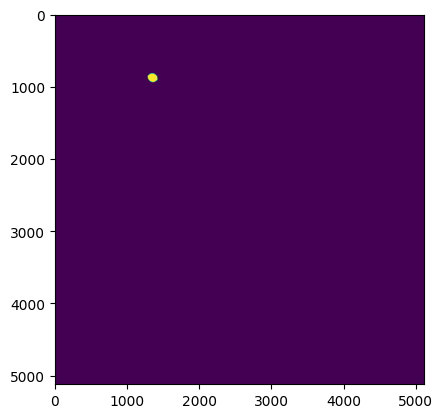

In [24]:
img = thresh
# b,g,r = cv2.split(img)          #分别提取B、G、R通道
# img = cv2.merge([r,g,b])   #重新组合为R、G、B
plt.imshow(img)
plt.show()  

In [18]:
thresh

0

In [20]:
ret

1.0

In [70]:
imgs

['Pic_2022_12_09_133251_1.jpg',
 'Pic_2022_12_09_133642_2.jpg',
 'Pic_2022_12_09_140241_4.jpg',
 'Pic_2022_12_09_140503_6.jpg',
 'Pic_2022_12_09_140622_7.jpg',
 'Pic_2022_12_09_140645_8.jpg',
 'Pic_2022_12_09_140727_9.jpg',
 'Pic_2022_12_09_140758_10.jpg',
 'Pic_2022_12_09_140933_11.jpg',
 'Pic_2022_12_09_141051_12.jpg',
 'Pic_2022_12_09_141111_13.jpg',
 'Pic_2022_12_09_141213_14.jpg',
 'Pic_2022_12_09_141300_15.jpg',
 'Pic_2022_12_09_141320_16.jpg',
 'Pic_2022_12_09_141359_17.jpg',
 'Pic_2022_12_09_141417_18.jpg']